In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Tasks.main import invKinematicSolver
import roboticstoolbox as rtb

## Robot Modelling

In [2]:
planar_2R = rtb.models.DH.Planar2()
print(planar_2R)

DHRobot: Planar 2 link, 2 joints (RR), dynamics, standard DH parameters
┌─────┬────┬────┬──────┐
│ θⱼ  │ dⱼ │ aⱼ │  ⍺ⱼ  │
├─────┼────┼────┼──────┤
│  q1 │  0 │  1 │ 0.0° │
│  q2 │  0 │  1 │ 0.0° │
└─────┴────┴────┴──────┘

┌──┬──┐
└──┴──┘

┌──────┬──────┬──────┐
│ name │ q0   │ q1   │
├──────┼──────┼──────┤
│   qr │  0°  │  90° │
│   qz │  0°  │  0°  │
│   q1 │  0°  │  90° │
│   q2 │  90° │ -90° │
└──────┴──────┴──────┘



~ Arbitrary Pathway - ellipse

In [3]:
# major axis
a = 4
# minor axis 
b = 3
t = np.linspace(0,10,100)

x = a * np.cos(t)
y = b * np.sin(t)

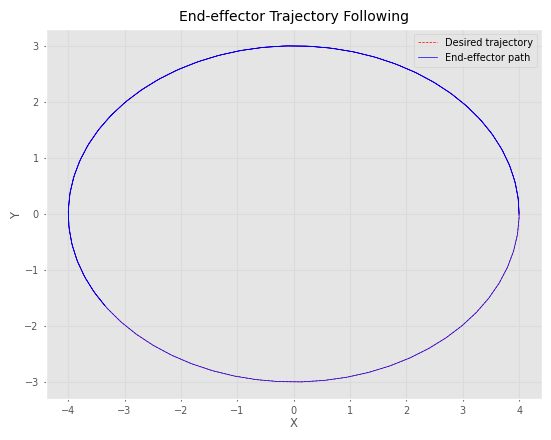

In [13]:
q = np.array([0.0, 0.0], dtype=float)
ee_traj = []

for x_target,y_target in zip(x,y):
    q_new = invKinematicSolver(x_target, y_target)
    q = q_new

    ee_traj.append([x_target, y_target])

ee_traj = np.array(ee_traj)

plt.figure()
plt.plot(x, y, 'r--', label='Desired trajectory')
plt.plot(ee_traj[:, 0], ee_traj[:, 1], 'b-', label='End-effector path')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('End-effector Trajectory Following')
plt.show()